#### Creating data to view and fit 

In [1]:
from sklearn.datasets import make_circles


x,y = make_circles(1000,noise=0.03,random_state=42)



In [2]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
import pandas as pd

circles = pd.DataFrame({"x0" : x[:,0],"x1":x[:,1],"label" : y})

circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


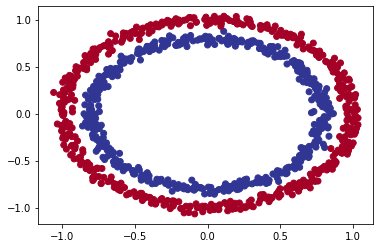

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)


#### Input and Output shapes

In [6]:
x.shape , y.shape

((1000, 2), (1000,))

In [7]:
len(x),len(y)

(1000, 1000)

In [8]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Modelling

In [9]:
import tensorflow as tf

In [12]:
tf.random.set_seed(42)
model_1  = tf.keras.Sequential([

    tf.keras.layers.Dense(1)
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics = ["accuracy"])


model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4830


In [14]:
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [15]:
# Model 2

model2 = tf.keras.Sequential([

    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics =["accuracy"] )


model2.fit(x,y,epochs=100,verbose=0)

In [16]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [19]:
# Model 3

model3 = tf.keras.Sequential([

    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])


model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ["accuracy"])

model3.fit(x,y,epochs=100,verbose=0)

In [20]:
model3.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5140


[0.6991010904312134, 0.5139999985694885]

In [21]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 4s 3ms/step
doing binary classifcation...


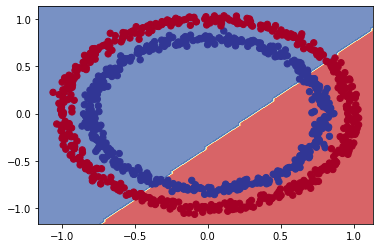

In [22]:
plot_decision_boundary(model3, x, y)

#### The missing piece :  Non Linearity

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation ="linear")
])

model_4.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics= ["accuracy"])


history = model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


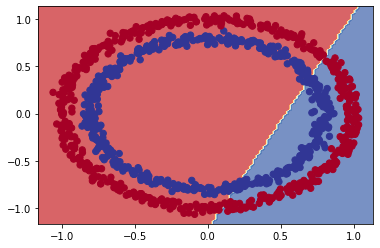

In [25]:
plot_decision_boundary(model_4,x,y)

In [26]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation="relu")
])


model_5.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics =["accuracy"])


history = model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


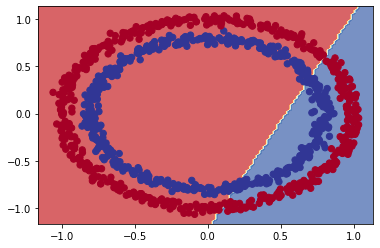

In [27]:
plot_decision_boundary(model_5,x,y)

In [43]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1) # Output Layer
])


model_6.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_6.fit(x,y,epochs=250,verbose=0)

In [37]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


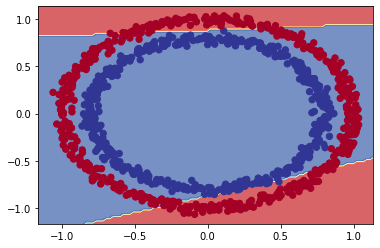

In [38]:
plot_decision_boundary(model_6,x,y)

In [41]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_7.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])

history = model_7.fit(x,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 7ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


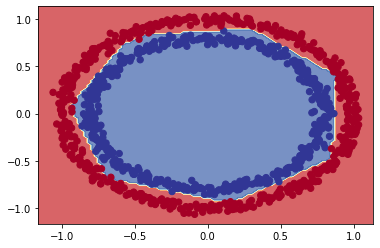

In [42]:
plot_decision_boundary(model_7,x,y)

#### Evaluating and improving our classification

In [44]:
len(x)

1000

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [47]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [49]:
# recreating a model to fit on the training data and to evaluate on test data

tf.random.set_seed(42)


model_8 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])



model_8.compile(loss ="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_8.fit(x_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.4913
Epoch 2/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5063
Epoch 3/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5063
Epoch 4/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5175
Epoch 5/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5312
Epoch 6/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5450
Epoch 7/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5475
Epoch 8/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5475
Epoch 9/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.5462
Epoch 10/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5500
Epoch 11/

In [51]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9800


[0.1112932562828064, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


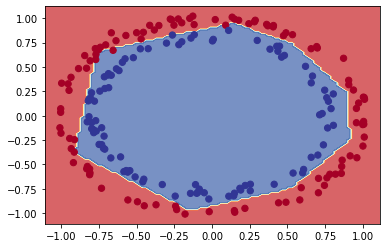

In [52]:
plot_decision_boundary(model_8,x_test,y_test)

##### Plotting loss curves

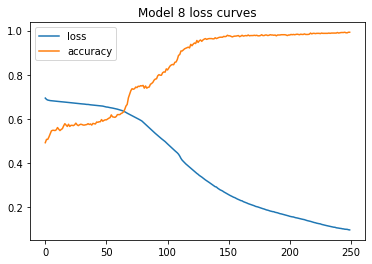

In [54]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves");

#### Finding the best learning rate

In [64]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_9.compile(loss = "binary_crossentropy",
optimizer = "Adam",
metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 *  10**(epoch/20))


history = model_9.fit(x_train,y_train,epochs=100,callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 0.6963 - accuracy: 0.4925 - precision: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.4913 - precision: 0.0000e+00 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4913 - precision: 0.4000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4963 - precision: 0.6000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.4988 - precision: 0.5714 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.4900 - precision: 0.4792 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.4925 - precision: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [=====================

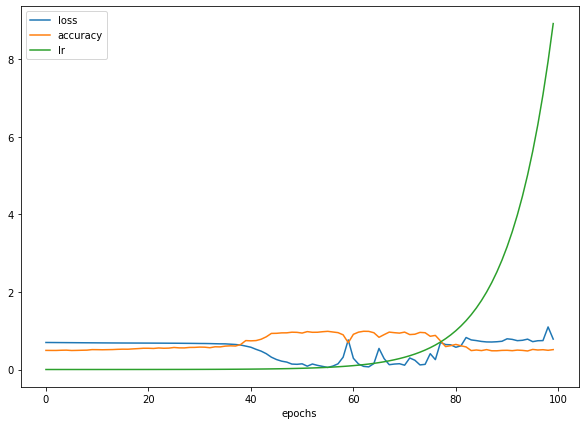

In [58]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs");

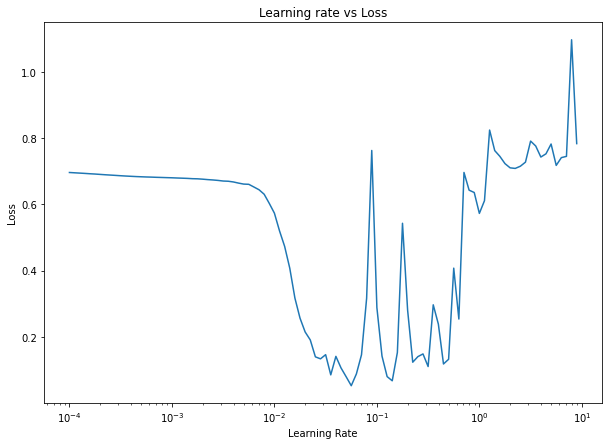

In [62]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

#### Confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [67]:
y_preds = model_9.predict(x_test)

7/7 [==============================] - 0s 4ms/step


In [68]:
y_preds

array([[0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],
       [0.6370209],


In [71]:
confusion_matrix(y_test,y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

The predictions are in the form of **prediction probability**. Round the probability predictions to either 0 or 1

In [73]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [72]:
confusion_matrix(y_test,tf.round(y_preds))

array([[  0, 106],
       [  0,  94]], dtype=int64)

### Working with a larger example

In [75]:
from tensorflow.keras.datasets import fashion_mnist

In [76]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [77]:
# Show first training sample

train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [79]:
# Show training labels

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [81]:
#Check the shape of single example

train_data[0].shape,train_labels[0].shape

((28, 28), ())

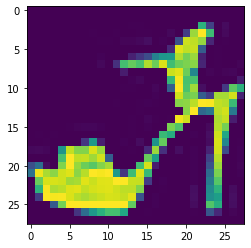

In [92]:
# Plot a single sample
plt.imshow(train_data[9])

In [93]:
train_labels[9]

5

In [94]:
# Create a small list so we can index our training labels in human readable format

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'Trouser')

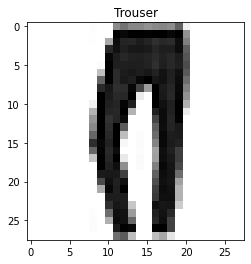

In [106]:
index_of_choice =2002
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

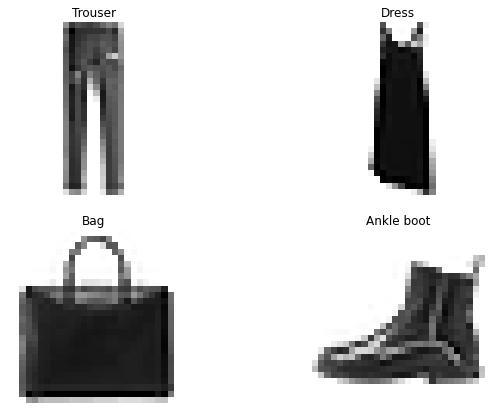

In [111]:
# Plot mutiple random images of fashion MNIST

import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_labels)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)



In [114]:
# Building a multiclass classification model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    
])

model.compile(loss = "sparse_categorical_crossentropy",
optimizer = tf.keras.optimizers.Adam(),
metrics =["accuracy"])

non_norm_history = model.fit(
    train_data,train_labels,epochs=10,validation_data = (test_data,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.1747 - accuracy: 0.1605 - val_loss: 1.8105 - val_accuracy: 0.2048
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.7032 - accuracy: 0.2533 - val_loss: 1.6383 - val_accuracy: 0.2844
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6340 - accuracy: 0.2794 - val_loss: 1.6074 - val_accuracy: 0.2866
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6074 - accuracy: 0.2846 - val_loss: 1.5927 - val_accuracy: 0.2928
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5916 - accuracy: 0.2918 - val_loss: 1.5940 - val_accuracy: 0.2868
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5840 - accuracy: 0.2998 - val_loss: 1.5663 - val_accuracy: 0.3063
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5664 - accuracy: 0.3144 - val_loss: 1.5603 - val_ac

In [115]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Normalizing our data
train_data.min(),train_data.max()

(0, 255)

In [119]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [120]:
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [124]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])



model_11.compile(loss = "sparse_categorical_crossentropy",
optimizer = "Adam",
metrics=["accuracy"])


norm_history = model_11.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

<AxesSubplot:title={'center':'Normalized Data'}>

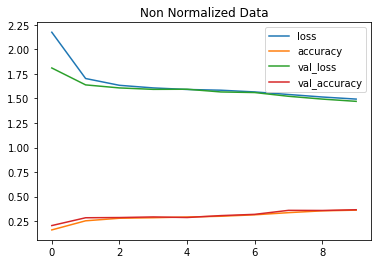

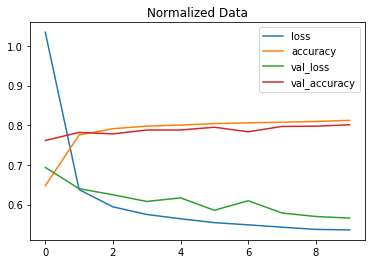

In [125]:
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [128]:
# Finding ideal learning rate
from tensorflow.keras.callbacks import LearningRateScheduler

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


model_12.compile(loss = "sparse_categorical_crossentropy",
optimizer = "Adam",
metrics = ["accuracy"])


lr_scheduler = LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))


history_12 = model_12.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 9

Text(0.5, 1.0, 'Leraning Rate')

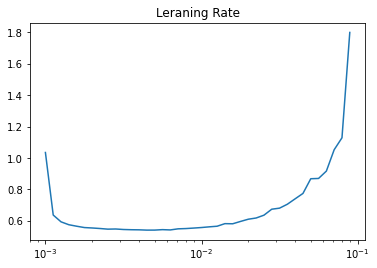

In [131]:
#Plotting loss curve


# pd.DataFrame(history_12.history).plot();

lrs =1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs,history_12.history["loss"])
plt.title("Leraning Rate")

In [132]:
10**-3

0.001

In [134]:
# Refitting the model with ideal learning rate

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss = "sparse_categorical_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history_13 = model_13.fit(train_data_norm,train_labels,validation_data=(test_data_norm,test_labels),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

#### Evaluate a model

In [146]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [143]:
y_probs = model_13.predict(test_data_norm)

313/313 [==============================] - 1s 3ms/step


In [144]:
y_probs

array([[8.56301696e-11, 3.53619803e-13, 2.66338648e-05, ...,
        9.18686166e-02, 4.06051567e-03, 8.07873905e-01],
       [3.42785506e-06, 1.28992146e-16, 9.59891379e-01, ...,
        1.13836218e-28, 6.32717682e-04, 4.47898074e-08],
       [6.10628340e-05, 9.96576846e-01, 4.38673133e-08, ...,
        7.32374713e-18, 5.48116148e-08, 4.92259974e-14],
       ...,
       [7.85796121e-02, 2.22948402e-05, 1.40333891e-01, ...,
        2.95333884e-20, 1.11972049e-01, 4.76002082e-09],
       [3.31108313e-05, 9.93013084e-01, 2.33922890e-07, ...,
        9.39847175e-15, 8.15923102e-07, 1.21589735e-11],
       [7.98162390e-08, 7.75788600e-10, 1.64706682e-04, ...,
        4.38264273e-02, 1.51625415e-03, 3.91206145e-02]], dtype=float32)

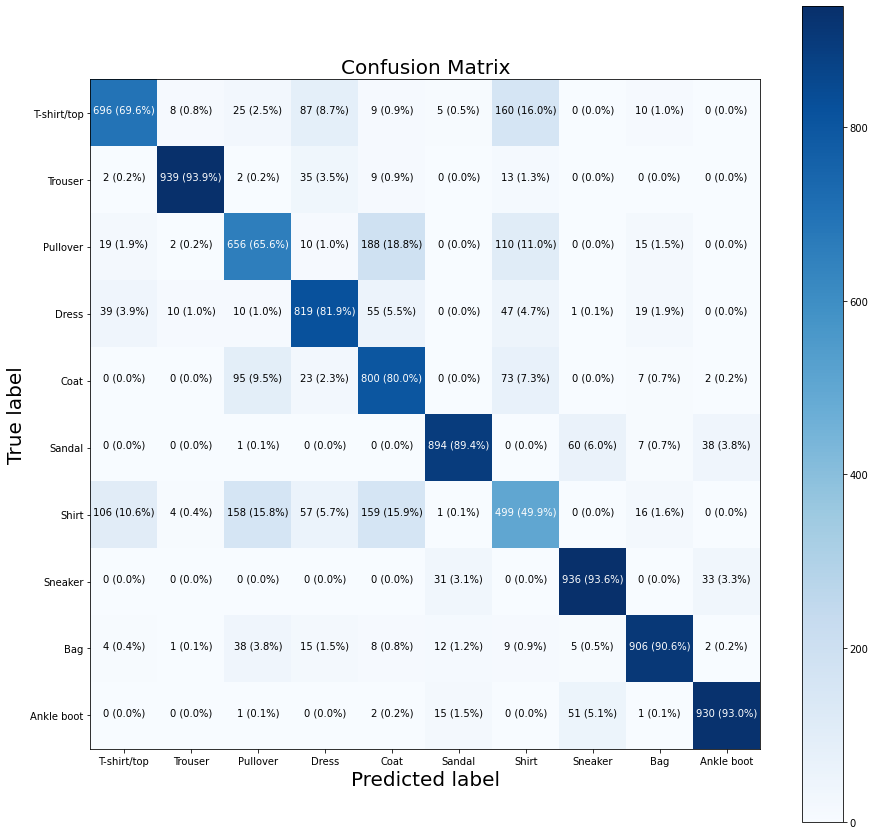

In [153]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (15, 15)

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_probs.argmax(axis=1))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = class_names

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=10)

In [169]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  
  pred_probs = model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 26ms/step


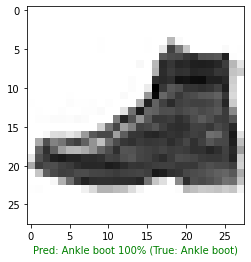

In [170]:
plot_random_image(model=model_13, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [172]:
test_data[0].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0